# RankUp.vet Resume Analysis

### Created by Abhi Banerjee

In [2]:
import os
import re
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.util import trigrams
from nltk.util import bigrams
from nltk.collocations import *
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Softmax, Embedding, GlobalMaxPool1D, GlobalAvgPool1D, Concatenate, Bidirectional, SpatialDropout1D

In [3]:
ls

RankUp.vet Resume NLP Analysis.ipynb


### Import Resume

In [4]:
os.chdir('/Users/abhi/funko_data_science/RankUp.vet/data/')

with open('resume.txt') as f:
    resume = f.read()

### Tokenize Resume

In [5]:
tokens = nltk.word_tokenize(resume.lower())
len(tokens)

575

### Remove Stopwords

In [6]:
token_list = [ ]

for token in tokens:
    if token not in set(stopwords.words('english')):
        token_list.append(token)

len(token_list)
token_list

['sara',
 'anderson',
 'address',
 ':',
 '410',
 'vine',
 'street',
 ',',
 'norfolk',
 ',',
 'va',
 '23502',
 'phone',
 ':',
 '(',
 '269',
 ')',
 '983-4722',
 'email',
 ':',
 'sara.anderson',
 '@',
 'yahoo.com',
 'current',
 'job',
 ':',
 'mathematics',
 'teacher',
 'st.',
 'joseph',
 'high',
 'school',
 'objective',
 ':',
 'gain',
 'employment',
 'mathematics',
 'educator',
 'one',
 'country',
 '’',
 'excellent',
 'outstanding',
 'educational',
 'establishments',
 'known',
 'producing',
 'students',
 'forefront',
 'field',
 '.',
 'skills',
 ':',
 '1.',
 'particularly',
 'adept',
 'creation',
 'stimulating',
 'learning',
 'environment',
 'students',
 'study',
 '2.',
 'possess',
 'genuine',
 'enthusiasm',
 'passion',
 'teaching',
 'math',
 '3.',
 'knowledge',
 'online',
 'learning',
 'platforms',
 'assist',
 'students',
 'learning',
 'outside',
 'classroom',
 '4.',
 'excellent',
 'subject',
 'knowledge',
 '5.',
 'proficient',
 'use',
 'new',
 'media',
 'internet',
 'promote',
 'interact

### Remove Punctuation

In [7]:
punctuation = re.compile(r'[-.?!,":;()|0-9]')
token_list_1 = []

for token in token_list:
    word = punctuation.sub("", token)
    if len(word)>0:
        token_list_1.append(word)

len(token_list_1)
token_list_1

['sara',
 'anderson',
 'address',
 'vine',
 'street',
 'norfolk',
 'va',
 'phone',
 'email',
 'saraanderson',
 '@',
 'yahoocom',
 'current',
 'job',
 'mathematics',
 'teacher',
 'st',
 'joseph',
 'high',
 'school',
 'objective',
 'gain',
 'employment',
 'mathematics',
 'educator',
 'one',
 'country',
 '’',
 'excellent',
 'outstanding',
 'educational',
 'establishments',
 'known',
 'producing',
 'students',
 'forefront',
 'field',
 'skills',
 'particularly',
 'adept',
 'creation',
 'stimulating',
 'learning',
 'environment',
 'students',
 'study',
 'possess',
 'genuine',
 'enthusiasm',
 'passion',
 'teaching',
 'math',
 'knowledge',
 'online',
 'learning',
 'platforms',
 'assist',
 'students',
 'learning',
 'outside',
 'classroom',
 'excellent',
 'subject',
 'knowledge',
 'proficient',
 'use',
 'new',
 'media',
 'internet',
 'promote',
 'interactive',
 'learning',
 'competent',
 'use',
 'latest',
 'teaching',
 'methods',
 'techniques',
 'admirable',
 'ability',
 'maintain',
 'high',
 's

### Parts of Speech (POS) Tagging

In [8]:
tokens_pos_tag = nltk.pos_tag(token_list_1)
pos_df = pd.DataFrame(tokens_pos_tag, columns = ('word','POS'))
pos_sum = pos_df.groupby('POS', as_index=False).count() # group by POS tags
pos_sum.sort_values(['word'], ascending=[False]) # order by descending frequency of terms

,POS,word
6,NN,119
3,JJ,74
8,NNS,62
13,VBG,25
15,VBP,22
12,VBD,18
7,NNP,13
9,RB,8
11,VB,5
14,VBN,4


### Filtering Nouns

In [9]:
filtered_pos = [ ]

for one in tokens_pos_tag:
    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
        filtered_pos.append(one)

len(filtered_pos)
filtered_pos

[('sara', 'NN'),
 ('anderson', 'NN'),
 ('address', 'NN'),
 ('street', 'NN'),
 ('norfolk', 'NNS'),
 ('phone', 'NN'),
 ('email', 'NN'),
 ('saraanderson', 'NN'),
 ('@', 'NNP'),
 ('yahoocom', 'NNP'),
 ('job', 'NN'),
 ('mathematics', 'NNS'),
 ('st', 'NN'),
 ('joseph', 'NN'),
 ('school', 'NN'),
 ('gain', 'NN'),
 ('employment', 'NN'),
 ('mathematics', 'NNS'),
 ('country', 'NN'),
 ('establishments', 'NNS'),
 ('students', 'NNS'),
 ('field', 'NN'),
 ('skills', 'NNS'),
 ('creation', 'NN'),
 ('environment', 'NN'),
 ('students', 'NNS'),
 ('enthusiasm', 'NN'),
 ('passion', 'NN'),
 ('math', 'NN'),
 ('knowledge', 'NN'),
 ('online', 'NN'),
 ('platforms', 'NNS'),
 ('students', 'NNS'),
 ('classroom', 'NN'),
 ('knowledge', 'NN'),
 ('proficient', 'NN'),
 ('use', 'NN'),
 ('media', 'NNS'),
 ('learning', 'NN'),
 ('competent', 'NN'),
 ('use', 'NN'),
 ('methods', 'NNS'),
 ('techniques', 'NNS'),
 ('ability', 'NN'),
 ('standards', 'NNS'),
 ('classroom', 'NN'),
 ('demeanor', 'NN'),
 ('classroom', 'NN'),
 ('managem

### Top 100 Terms in Resume

In [10]:
fdist_pos = nltk.FreqDist(filtered_pos)
top_100_words = fdist_pos.most_common()
top_100_words

[(('students', 'NNS'), 8),
 (('school', 'NN'), 7),
 (('*', 'NNP'), 7),
 (('mathematics', 'NNS'), 6),
 (('math', 'NN'), 5),
 (('classroom', 'NN'), 4),
 (('methods', 'NNS'), 4),
 (('skills', 'NNS'), 3),
 (('use', 'NN'), 3),
 (('student', 'NN'), 3),
 (('activities', 'NNS'), 3),
 (('teacher', 'NN'), 3),
 (('duties', 'NNS'), 3),
 (('statistics', 'NNS'), 3),
 (('trigonometry', 'NN'), 3),
 (('*', 'NN'), 3),
 (('hartford', 'NN'), 3),
 (('st', 'NN'), 2),
 (('joseph', 'NN'), 2),
 (('passion', 'NN'), 2),
 (('knowledge', 'NN'), 2),
 (('techniques', 'NNS'), 2),
 (('willingness', 'NN'), 2),
 (('class', 'NN'), 2),
 (('–', 'NNP'), 2),
 (('va', 'NN'), 2),
 (('classes', 'NNS'), 2),
 (('introduction', 'NN'), 2),
 (('algebra', 'NN'), 2),
 (('lessons', 'NNS'), 2),
 (('concepts', 'NNS'), 2),
 (('education', 'NN'), 2),
 (('bachelor', 'NN'), 2),
 (('sara', 'NN'), 1),
 (('anderson', 'NN'), 1),
 (('address', 'NN'), 1),
 (('street', 'NN'), 1),
 (('norfolk', 'NNS'), 1),
 (('phone', 'NN'), 1),
 (('email', 'NN'), 1

In [11]:
len(top_100_words)

124

In [12]:
top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))
top_words_df.head()

,pos,count
0,"(students, NNS)",8
1,"(school, NN)",7
2,"(*, NNP)",7
3,"(mathematics, NNS)",6
4,"(math, NN)",5


In [13]:
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) # split the tuple of POS
top_words_df = top_words_df.drop('pos', 1) # drop the previous column
top_words_df.head()

,count,Word
0,8,students
1,7,school
2,7,*
3,6,mathematics
4,5,math


In [14]:
a = " ".join(top_words_df.Word)
a

'students school * mathematics math classroom methods skills use student activities teacher duties statistics trigonometry * hartford st joseph passion knowledge techniques willingness class – va classes introduction algebra lessons concepts education bachelor sara anderson address street norfolk phone email saraanderson @ yahoocom job gain employment country establishments field creation environment enthusiasm online platforms proficient media learning competent ability standards demeanor management mile stay clever suit group supervise events communication norfolk sections lesson plans pupils materials colleagues resources program level department ’ board hastings richmond calculus attention interest understanding aid performance conferences meetings development seminars mi substitute core subjects manner styles participation files records milieu efficiency productivity afterschool college michigan state university science arts champion council president gpa courses equations geometr

In [15]:
subset_pos = top_words_df[['Word', 'count']]
tuples_pos = [tuple(x) for x in subset_pos.values]
tuples_pos

[('students', 8),
 ('school', 7),
 ('*', 7),
 ('mathematics', 6),
 ('math', 5),
 ('classroom', 4),
 ('methods', 4),
 ('skills', 3),
 ('use', 3),
 ('student', 3),
 ('activities', 3),
 ('teacher', 3),
 ('duties', 3),
 ('statistics', 3),
 ('trigonometry', 3),
 ('*', 3),
 ('hartford', 3),
 ('st', 2),
 ('joseph', 2),
 ('passion', 2),
 ('knowledge', 2),
 ('techniques', 2),
 ('willingness', 2),
 ('class', 2),
 ('–', 2),
 ('va', 2),
 ('classes', 2),
 ('introduction', 2),
 ('algebra', 2),
 ('lessons', 2),
 ('concepts', 2),
 ('education', 2),
 ('bachelor', 2),
 ('sara', 1),
 ('anderson', 1),
 ('address', 1),
 ('street', 1),
 ('norfolk', 1),
 ('phone', 1),
 ('email', 1),
 ('saraanderson', 1),
 ('@', 1),
 ('yahoocom', 1),
 ('job', 1),
 ('gain', 1),
 ('employment', 1),
 ('country', 1),
 ('establishments', 1),
 ('field', 1),
 ('creation', 1),
 ('environment', 1),
 ('enthusiasm', 1),
 ('online', 1),
 ('platforms', 1),
 ('proficient', 1),
 ('media', 1),
 ('learning', 1),
 ('competent', 1),
 ('ability'

### Create WordCloud

In [19]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(dict(tuples_pos))

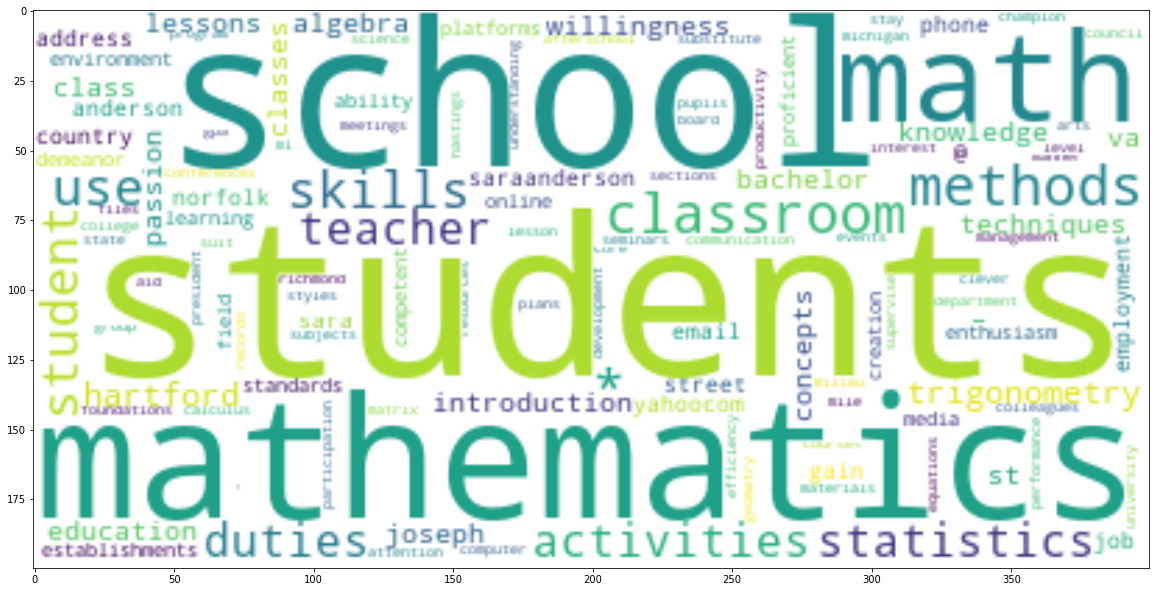

In [20]:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

### Bigram Analysis

In [21]:
bg = nltk.bigrams(tokens)
fdist = nltk.FreqDist(bg)
top_100_bigrams = fdist.most_common(100)
bg_df = pd.DataFrame(top_100_bigrams, columns = ('bigram','count'))
bg_df.head(10)

,bigram,count
0,"(high, school)",6
1,"(school, ,)",4
2,"(,, va)",3
3,"(of, the)",3
4,"(in, the)",3
5,"(use, of)",3
6,"(teaching, methods)",3
7,"(activities, and)",3
8,"(teacher, ,)",3
9,"(duties, and)",3


In [22]:
bg_df['phrase'] = bg_df['bigram'].apply(lambda x: x[0]+" "+x[1]) # convert tuple to string
bg_df['filter_bg'] = bg_df['phrase'].str.contains(punctuation) # strings with numbers & punctuation
bg_df = bg_df[bg_df.filter_bg == False] # remove strings with numbers & punctuation
bg_df = bg_df.drop('bigram', 1)
bg_df = bg_df.drop('filter_bg', 1) # remove excess columns
bg_df.reset_index()
bg_df.head(10)

,count,phrase
0,6,high school
3,3,of the
4,3,in the
5,3,use of
6,3,teaching methods
7,3,activities and
9,3,duties and
10,3,and responsibilities
11,3,responsibilities *
12,3,introduction to


### Trigram Analysis

In [23]:
tg = nltk.trigrams(tokens)
fdist_tg = nltk.FreqDist(tg)
top_100_trigrams = fdist_tg.most_common(100)
tg_df = pd.DataFrame(top_100_trigrams, columns = ('trigram','count'))
tg_df.head(10)

,trigram,count
0,"(high, school, ,)",4
1,"(duties, and, responsibilities)",3
2,"(and, responsibilities, *)",3
3,"(,, norfolk, ,)",2
4,"(norfolk, ,, va)",2
5,"(st., joseph, high)",2
6,"(joseph, high, school)",2
7,"(in, the, use)",2
8,"(the, use, of)",2
9,"(teaching, methods, and)",2


In [24]:
tg_df['phrase'] = tg_df['trigram'].apply(lambda x: x[0]+" "+x[1]+" "+x[2])
tg_df['filter_tg'] = tg_df['phrase'].str.contains(punctuation)
tg_df = tg_df[tg_df.filter_tg == False]
tg_df = tg_df.drop('trigram', 1)
tg_df = tg_df.drop('filter_tg', 1)
tg_df.reset_index()
tg_df.head(10)

,count,phrase
1,3,duties and responsibilities
2,3,and responsibilities *
6,2,joseph high school
7,2,in the use
8,2,the use of
9,2,teaching methods and
10,2,methods and techniques
15,2,va duties and
17,2,hartford high school
19,1,sara anderson address


### Bidirectional RNN for Resume Text Sentiment

In [ ]:
#Load Training Data resumes.tar.gz
df = pd.read_csv("resumes.tar.gz", compression='gzip')

#Load transcribed text file
with open('resumes_transcribe.txt') as f:
    aws_text = [word for line in f for word in line.split()]

#Initialize Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.text)

x = pad_squences(tokenizer.texts_to_sequences(df.text),50)
y = df.sentiment

#Build RNN
input = Input((50,), name='input')
embed = Embedding(len(tokenizer.word_index), 100)(input)
embed_dropout = SpatialDropout1D(0.5)(embed)
rnn = Bidirectional(GRI(50, return_sequences=True, recurrent_dropout=0.2))(embed_dropout)
max_pool = GlobalMaxPool1D()(rnn)
avg_pool = GlobalAvgPool1D()(rnn)
concat = Concatenate()([max_pool, avg_pool])
dense = Dense(3, activation='softmax')(concat)

#Train RNN
model = Model(input,dense)
model.compile('adam', 'sparse_categorical_crossentropy', ['sparse_categorical_accuracy'])
model.fit(x, y, batch_size=512, validation_split=0.2, epochs=25)

#Predict Sentiment
model.predict(pad_sequences(tokenizer.texts_to_sequences(aws_text), 50))